In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import math


In [359]:
senti = pd.read_csv("senti_clean.csv")

In [360]:
senti

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,pair,actor1,actor2,lineCount,score,actor1match,actor2match
0,0,0,0,"('ChaSeungWon', 'LeeSeungGi')",ChaSeungWon,LeeSeungGi,5,0.592857,"SungHyuk, BaeSooBin, SungHyuk, BaeSooBin",NaN
1,1,1,1,"('JungHaeIn', 'SonYeJin')",JungHaeIn,SonYeJin,9,0.501087,"ParkJiBin, ParkJiBin","BangMinAh, KimYooJung, BangMinAh, KimYooJung"
2,2,2,2,"('GoSungHee', 'YoonHyunMin')",GoSungHee,YoonHyunMin,5,0.487549,SeoYeJi,"JangKiYong, Chani"
3,3,3,3,"('ChoiJinHyuk', 'SongJiHyo')",ChoiJinHyuk,SongJiHyo,5,0.478333,"LeeHyunJin, LeeHyunJin","ShinDongMi, ShinDongMi"
4,4,4,4,"('JungEunJi', 'KimJiSoo')",JungEunJi,KimJiSoo,6,0.466667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
97,97,97,97,"('JoJungSuk', 'ParkBoYoung')",JoJungSuk,ParkBoYoung,8,0.105357,NaN,"NaHaeRyung, NaHaeRyung"
98,98,98,98,"('KimHeeAe', 'YooAhIn')",KimHeeAe,YooAhIn,5,0.098148,NaN,NaN
99,99,99,99,"('RoWoon', 'WonJinAh')",RoWoon,WonJinAh,7,0.047791,NaN,"KimDaMi, MoonGeunYoung, KimDaMi, MoonGeunYoung"
100,100,100,100,"('KimGoEun', 'ParkHaeJin')",KimGoEun,ParkHaeJin,8,0.025000,"JoHyeJoo, ChoiARa, LeeSooJi, KimSeulGi, KimHye...",One


We will try to find actors and actresses that have duplicates only, which means they have 2 or more potential matches.

In [361]:
actorlist= []

In [362]:
for i in senti.actor1:
    actorlist.append(i)

In [363]:
for i in senti.actor2:
    actorlist.append(i)

In [364]:
actorlist

['ChaSeungWon',
 'JungHaeIn',
 'GoSungHee',
 'ChoiJinHyuk',
 'JungEunJi',
 'ParkHyeSoo',
 'ParkMinYoung',
 'JangKiYong',
 'ChaeSooBin',
 'GongYoo',
 'HwangJungEum',
 'BangMinAh',
 'KimJungHyun',
 'JiChangWook',
 'KimYooJung',
 'JiHyunWoo',
 'HyunBin',
 'ChoiKangHee',
 'LeeSeoJin',
 'KimAhJoong',
 'JungSoMin',
 'IU',
 'LeeSungKyung',
 'LeeMinHo',
 'LeeJoonHyuk',
 'KimJiWon',
 'ParkBoYoung',
 'LeeDongWook',
 'LeeJunHo',
 'Nana',
 'HaJiWon',
 'ChaEunWoo',
 'ParkJinYoung',
 'LeeJeHoon',
 'HaJiWon',
 'JiChangWook',
 'IU',
 'LeeJongSuk',
 'ShinMinAh',
 'JooJiHoon',
 'LeeSeungGi',
 'JunJiHyun',
 'HanGiChan',
 'KimDongWook',
 'Krystal',
 'KimJaeWook',
 'MoonChaeWon',
 'GongHyoJin',
 'SongHyeKyo',
 'JiChangWook',
 'ParkYooChun',
 'JungSoMin',
 'AhnHyoSeop',
 'JiChangWook',
 'KwonNaRa',
 'KimHyeYoon',
 'KimSooHyun',
 'LeeJoonGi',
 'LeeJongSuk',
 'GongSeungYeon',
 'JungYongHwa',
 'JinKiJoo',
 'KimSoHyun',
 'GongHyoJin',
 'ImShiWan',
 'HanGroo',
 'TakWooSuk',
 'KimTaeRi',
 'HanJiMin',
 'JiChangWoo

In [365]:
from collections import Counter
counts = Counter(actorlist)
output = [value for value, count in counts.items() if count > 1]

Output is a list of all the names of the actors and actresses that have more than 1 match. This will be the baseline for us to recommend matches for whoever is not in this list.

In [366]:
mustanalyse = [x for x in actorlist if x not in output]

Mustanalyse is a list of all the names that only have 1 match and hence matching it with that given match is not accurate because we must have at least 1 match to compare and find the better one. If we just match this person to a match naively just because that particular actor or actress has only ever played with one actor or actress before, it is not going to be accurate, and it is going to further worsen the problem because we are going to recommend the match of this actor or actress for other newcomers. In the best case, we can just treat the actors inside this list like a newcomer but because it is going to need a different algorithm and in the interest of time, I will not be doing facial similarity on these actors.

In [367]:
baseline = pd.DataFrame(output, columns = ["actor"])

In [368]:
baseline

,actor
0,JungHaeIn
1,ParkMinYoung
2,JangKiYong
3,ChaeSooBin
4,GongYoo
5,HwangJungEum
6,JiChangWook
7,KimYooJung
8,HyunBin
9,JungSoMin


In [369]:
baseline['match'] = np.nan
baseline['score'] = np.nan
baseline['linecount'] = np.nan

In [370]:
baseline

,actor,match,score,linecount
0,JungHaeIn,NaN,NaN,NaN
1,ParkMinYoung,NaN,NaN,NaN
2,JangKiYong,NaN,NaN,NaN
3,ChaeSooBin,NaN,NaN,NaN
4,GongYoo,NaN,NaN,NaN
5,HwangJungEum,NaN,NaN,NaN
6,JiChangWook,NaN,NaN,NaN
7,KimYooJung,NaN,NaN,NaN
8,HyunBin,NaN,NaN,NaN
9,JungSoMin,NaN,NaN,NaN


We are going to create a basically new csv for our dashboard because I made the dashboard in R and not python so I can't just copy all the cleaning to get the dashboard to work and the easiest and fastest way is to clean everything in python, transfer it to R in terms of a csv and get working on the dashboard.

In [371]:
baseline['match'] = baseline.match.astype(str)
baseline['score'] = baseline.score.astype(str)
baseline['linecount'] = baseline.linecount.astype(str)

In [372]:
maxi = 0
yes = 0

We are going to use for loop to find the best match for all the actors in our baseline dataframe (best match means the highest sentiment analysis score).

In [373]:
senti = senti.drop(["Unnamed: 0", "Unnamed: 0.1"], 1)

In [383]:
for j in range(0,48):
    for i in range(0,102):
        if ((baseline.iloc[j, 0] == senti.iloc[i, 2] or baseline.iloc[j, 0] == senti.iloc[i, 3]) and senti.iloc[i, 5]>maxi):
            maxi = senti.iloc[i, 5]
            if baseline.iloc[j, 0] == senti.iloc[i, 2]:
                yes = 1
            if yes == 1:
                baseline.at[j, 'match'] = senti.iloc[i, 3]
            if yes == 0:
                baseline.at[j, 'match'] = senti.iloc[i, 2]
            baseline.at[j, 'score'] = senti.iloc[i, 5]
            baseline.at[j, 'linecount'] = senti.iloc[i, 4]
        yes = 0
    maxi = 0
            

In [387]:
baseline = baseline.sort_values("actor").reset_index().drop("index", 1)

In [389]:
#baseline.to_csv("dfR.csv")

Next, we are going to see the distribution of the sentiment analysis score in order to classify it as high, mid or low chemistry (with respect to all the scores in this particular csv and not just in general) in our dashboard.

In [390]:
baseline.score = baseline.score.astype('float')

<AxesSubplot:xlabel='score', ylabel='Density'>

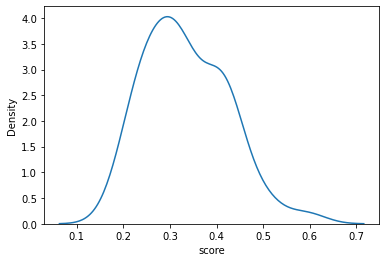

In [391]:
sns.kdeplot(baseline['score'])

In [392]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)


def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev

In [393]:
std = stdev(baseline.score)

In [394]:
baseline.score.mean()-std

0.24659349231117578

In [395]:
baseline.score.mean()+std

0.42236152485490697

This represents the mid chemistry level whereas anything below 24.7% is considered low and anything above 42.2% is considered high.

Now, we are going to tackle with actors that have played in dramas that only have few reviews but looks quite similar to an actor or actress, hence we can make use of the facial similarity analysis in order to recommend them a match.

In [57]:
senti.actor1match = senti.actor1match.astype('string')
senti.actor2match = senti.actor2match.astype('string')

In [396]:
actor1mat = senti.dropna(subset = ['actor1match'])

In [398]:
actor1mat

,Unnamed: 0.1.1,pair,actor1,actor2,lineCount,score,actor1match,actor2match
0,0,"('ChaSeungWon', 'LeeSeungGi')",ChaSeungWon,LeeSeungGi,5,0.592857,"SungHyuk, BaeSooBin, SungHyuk, BaeSooBin",NaN
1,1,"('JungHaeIn', 'SonYeJin')",JungHaeIn,SonYeJin,9,0.501087,"ParkJiBin, ParkJiBin","BangMinAh, KimYooJung, BangMinAh, KimYooJung"
2,2,"('GoSungHee', 'YoonHyunMin')",GoSungHee,YoonHyunMin,5,0.487549,SeoYeJi,"JangKiYong, Chani"
3,3,"('ChoiJinHyuk', 'SongJiHyo')",ChoiJinHyuk,SongJiHyo,5,0.478333,"LeeHyunJin, LeeHyunJin","ShinDongMi, ShinDongMi"
5,5,"('ParkHyeSoo', 'YeonWooJin')",ParkHyeSoo,YeonWooJin,5,0.449259,"KimSeJeong, HanJiMin",LeeJoonHyuk
6,6,"('ParkMinYoung', 'SeoKangJoon')",ParkMinYoung,SeoKangJoon,7,0.433478,"ParkJooMi, Eugene","JungKyungHo, KangHoon"
7,7,"('JangKiYong', 'JinKiJoo')",JangKiYong,JinKiJoo,8,0.426190,"YoonHyunMin, YoonHyunMin",NaN
11,11,"('BangMinAh', 'NamgoongMin')",BangMinAh,NamgoongMin,8,0.407018,"SonYeJin, YooSeoJin, HwangBoRa",KimJaeWook
12,12,"('KimJungHyun', 'KimSeJeong')",KimJungHyun,KimSeJeong,6,0.397656,"ChoiDaniel, ChoiChanHo, ChoiDaniel, ChoiChanHo","ParkHyeSoo, ParkHyeSoo"
13,13,"('JiChangWook', 'ParkMinYoung')",JiChangWook,ParkMinYoung,34,0.397158,"LeeSooHyuk, LeeSooHyuk","ParkJooMi, Eugene, ParkJooMi, Eugene"


In [399]:
senti.actor1.unique()

array(['ChaSeungWon', 'JungHaeIn', 'GoSungHee', 'ChoiJinHyuk',
       'JungEunJi', 'ParkHyeSoo', 'ParkMinYoung', 'JangKiYong',
       'ChaeSooBin', 'GongYoo', 'HwangJungEum', 'BangMinAh',
       'KimJungHyun', 'JiChangWook', 'KimYooJung', 'JiHyunWoo', 'HyunBin',
       'ChoiKangHee', 'LeeSeoJin', 'KimAhJoong', 'JungSoMin', 'IU',
       'LeeSungKyung', 'LeeMinHo', 'LeeJoonHyuk', 'KimJiWon',
       'ParkBoYoung', 'LeeDongWook', 'LeeJunHo', 'Nana', 'HaJiWon',
       'ChaEunWoo', 'ParkJinYoung', 'LeeJeHoon', 'LeeJongSuk',
       'ShinMinAh', 'JooJiHoon', 'LeeSeungGi', 'JunJiHyun', 'HanGiChan',
       'KimDongWook', 'Krystal', 'KimJaeWook', 'MoonChaeWon',
       'GongHyoJin', 'SongHyeKyo', 'ParkYooChun', 'AhnHyoSeop',
       'KwonNaRa', 'KimHyeYoon', 'KimSooHyun', 'LeeJoonGi',
       'GongSeungYeon', 'JungYongHwa', 'JinKiJoo', 'KimSoHyun',
       'ImShiWan', 'HanGroo', 'TakWooSuk', 'KimTaeRi', 'HanJiMin',
       'HeoHyunJun', 'ImSooJung', 'LeeBoYoung', 'HanHyoJoo', 'KimDaMi',
       'JoBoAh

In [400]:
ac = actor1mat.actor1match.str.split(',').tolist()

In [401]:
ac = pd.DataFrame(ac, index=actor1mat.actor1).stack()

In [402]:
ac = ac.reset_index()[[0, 'actor1']] # var1 variable is currently labeled 0
ac.columns = ['new', 'facialmatched'] # renaming var1

What we did was we are going to make a very simple dataframe where its just the input (meaning the names of the newcomers and) the corresponding output (meaning the names of the actor that looks the most similar to them). Next, we are going to do the same to the other column (actor2) and just concatenate them together into one csv.

In [403]:
ac.head()

,new,facialmatched
0,SungHyuk,ChaSeungWon
1,BaeSooBin,ChaSeungWon
2,SungHyuk,ChaSeungWon
3,BaeSooBin,ChaSeungWon
4,ParkJiBin,JungHaeIn


In [404]:
actor2mat = senti.dropna(subset = ['actor2match'])

In [405]:
ac2 = actor2mat.actor2match.str.split(',').tolist()

In [406]:
ac2 = pd.DataFrame(ac2, index=actor2mat.actor2).stack()

In [407]:
ac2 = ac2.reset_index()[[0, 'actor2']] # var1 variable is currently labeled 0
ac2.columns = ['new', 'facialmatched'] # renaming var1

In [408]:
fin = pd.concat([ac,ac2],axis = 0)

In [409]:
fin

,new,facialmatched
0,SungHyuk,ChaSeungWon
1,BaeSooBin,ChaSeungWon
2,SungHyuk,ChaSeungWon
3,BaeSooBin,ChaSeungWon
4,ParkJiBin,JungHaeIn
...,...,...
196,MoonGeunYoung,WonJinAh
197,KimDaMi,WonJinAh
198,MoonGeunYoung,WonJinAh
199,One,ParkHaeJin


We are going to use the names of the actors in the baseline to drop the names of other actors in the column facialmatched because they are not in our baseline csv and hence we do not have a match to recommend if a newcomer happens to look like an actor that is not in our baseline csv.

In [410]:
fin.new = fin.new.str.strip()

In [411]:
fin.facialmatched = fin.facialmatched.str.strip()

In [412]:
analyse = fin[fin.facialmatched.isin(output)]

In [413]:
analyse[analyse.new == "NaHaeRyung"]

,new,facialmatched
40,NaHaeRyung,ParkBoYoung
102,NaHaeRyung,ParkBoYoung
103,NaHaeRyung,ParkBoYoung
193,NaHaeRyung,ParkBoYoung
194,NaHaeRyung,ParkBoYoung


Since we found out that there are some duplicates in the newcomers' names, we will drop them.

In [414]:
unique = analyse.drop_duplicates('new', keep = 'first')

We are going to use a different csv in order to find how similar the actor is resembling to another actor.

In [415]:
unique

,new,facialmatched
4,ParkJiBin,JungHaeIn
11,ParkJooMi,ParkMinYoung
12,Eugene,ParkMinYoung
13,YoonHyunMin,JangKiYong
22,LeeSooHyuk,JiChangWook
...,...,...
90,LeeRuby,ShinSeKyung
91,BaeSuzy,ShinSeKyung
92,Yura,ShinSeKyung
135,JooSangWook,JiSung


In [416]:
listA = unique.new.to_list()
actor = pd.read_csv("actor.csv")

In [417]:
actress = pd.read_csv("actress.csv")

In [418]:
actor = actor[actor.Actor.isin(listA)]

In [419]:
actress = actress[actress.Actor.isin(listA)]

In [420]:
final = pd.concat([actor, actress], 0).sort_values("Actor").reset_index().drop("index", 1)

In [421]:
final['percentage_similarity'] = (1-final.Least_Array_Diff)*100

In [422]:
final = final.drop("Unnamed: 0", 1)

In [424]:
#final.to_csv("final.csv")

<AxesSubplot:xlabel='percentage_similarity', ylabel='Density'>

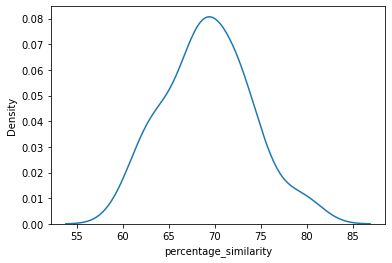

In [425]:
sns.kdeplot(final.percentage_similarity)

In [426]:
std = stdev(final.percentage_similarity)

In [427]:
mean = final.percentage_similarity.mean()

In [428]:
mean-std

64.6323103183621

In [429]:
mean+std

73.84459656402993

Similar to previously, we aplotted the distribution of the percentage similarity and we will hence categorise any facial similarity score that is lower than 64.6% as low and a score that is higher than 73.8% as high.